<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn nbformat plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [6]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [7]:
from pyodide.http import pyfetch

def __init__(self, **kwargs):
        self.hit_points = random.randint(self.min_hit_points, self.max_hit_points)


async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL


await download(path, "dataset.csv")
file_name  = "dataset.csv"

AttributeError: type object 'AbortController' has no attribute 'new'

---


# Test Environment


In [25]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Step 1: Load the dataset from the given URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(url)

In [13]:
description = df.describe(include='all')
print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

In [14]:
# Step 2: Generate statistical description for all feature columns
def stat_description(df):
    # Separate numerical and categorical features
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns
    
    descriptions = []

    # Statistical description for numerical columns
    for col in num_cols:
        descr = df[col].describe().to_frame().transpose()
        descr.index = [f"{col}_describe"]
        descriptions.append(descr)

    # Statistical description for categorical columns
    for col in cat_cols:
        # Unique categories and their counts
        categories = df[col].unique()
        category_counts = df[col].value_counts()
        
        descr = pd.DataFrame({
            "Category": categories,
            "Count": category_counts
        })
        descr.index.name = f"{col}_index"
        descr.rename(columns={col: "Frequency"}, inplace=True)
        descriptions.append(descr)
    
    # Concatenate all descriptions
    full_description = pd.concat(descriptions, axis=1)
    full_description.columns = full_description.iloc[0]
    full_description = full_description.iloc[1:]  # Remove the header row
    
    return full_description

# Generate and print the statistical description
description = stat_description(df)
print(description)

Unnamed: 0.1_describe      238.000000  118.500000  68.848868   0.000000    \
Unnamed: 0_describe               NaN         NaN         NaN         NaN   
Category_describe                 NaN         NaN         NaN         NaN   
GPU_describe                      NaN         NaN         NaN         NaN   
OS_describe                       NaN         NaN         NaN         NaN   
CPU_core_describe                 NaN         NaN         NaN         NaN   
Screen_Size_inch_describe         NaN         NaN         NaN         NaN   
CPU_frequency_describe            NaN         NaN         NaN         NaN   
RAM_GB_describe                   NaN         NaN         NaN         NaN   
Storage_GB_SSD_describe           NaN         NaN         NaN         NaN   
Weight_pounds_describe            NaN         NaN         NaN         NaN   
Price_describe                    NaN         NaN         NaN         NaN   
Screen-Full_HD_describe           NaN         NaN         NaN         NaN   

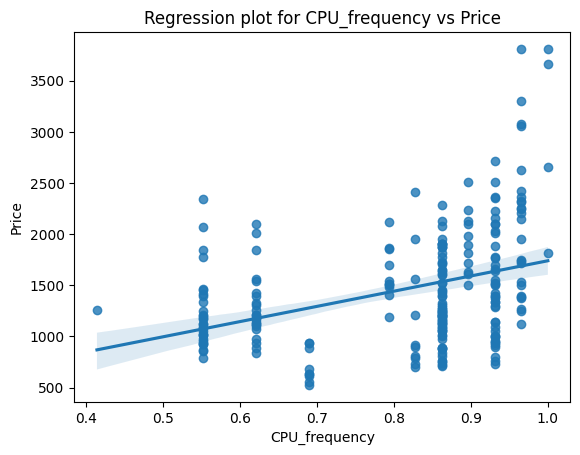

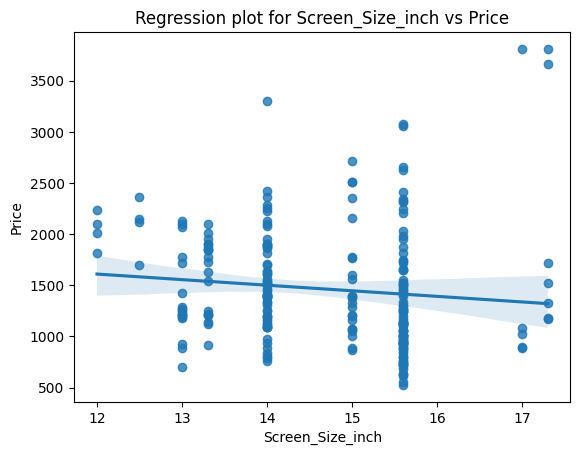

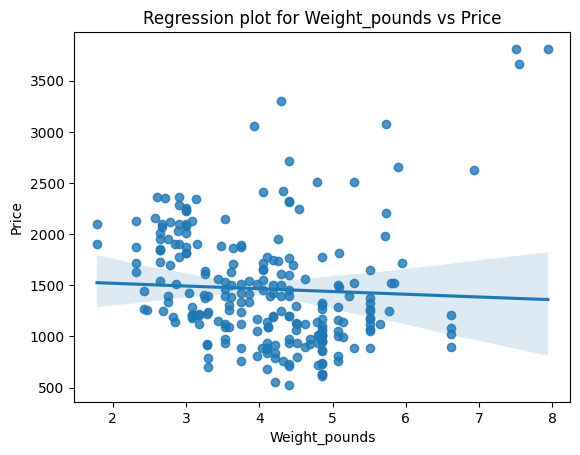

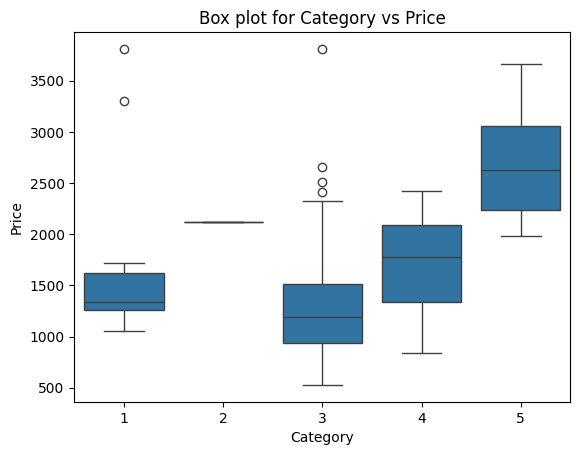

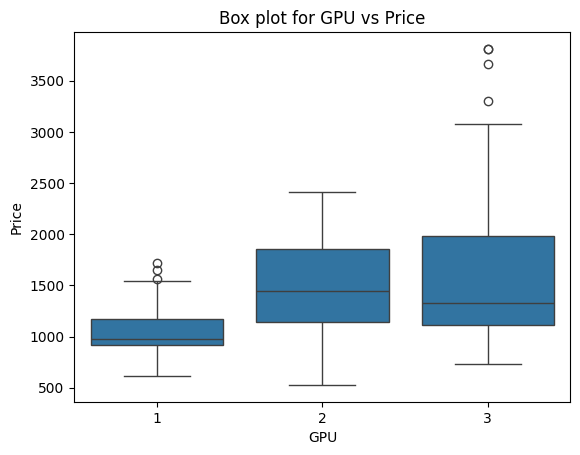

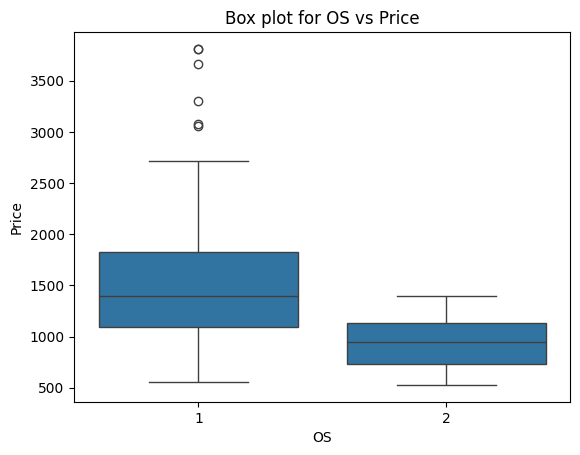

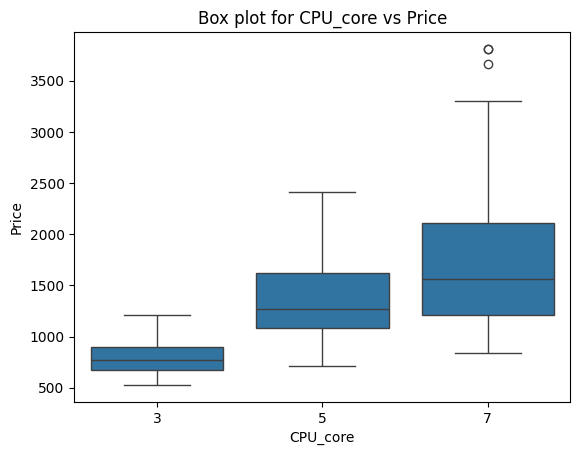

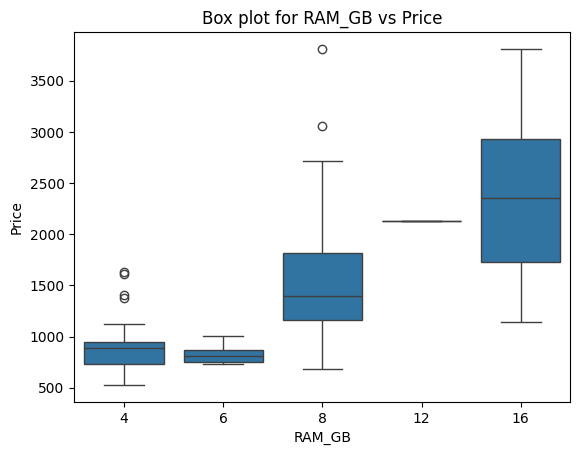

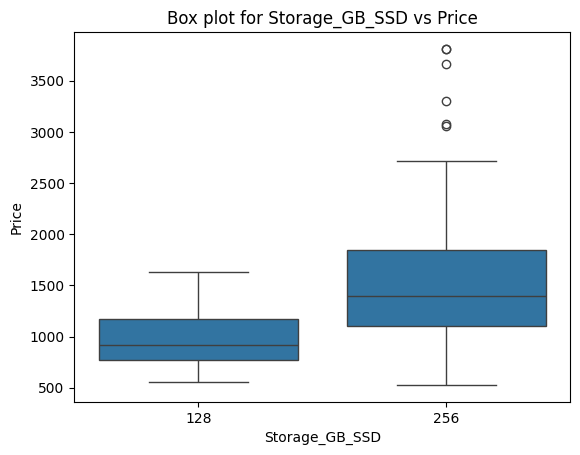

In [22]:
# Code in Lab
regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()
# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

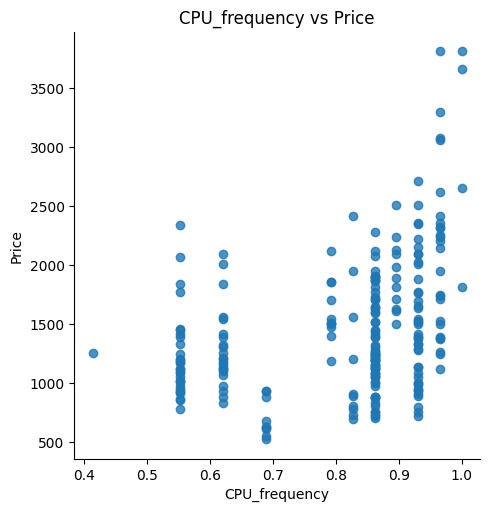

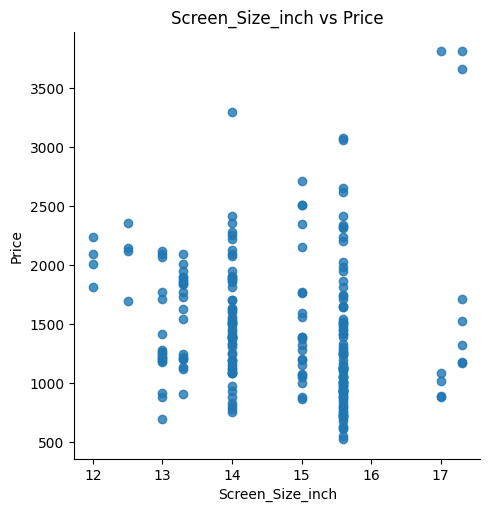

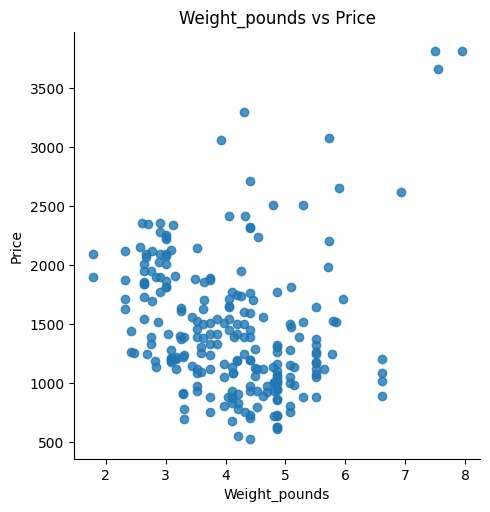

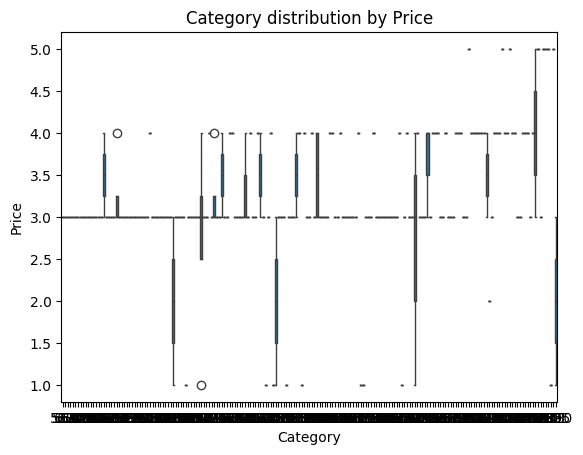

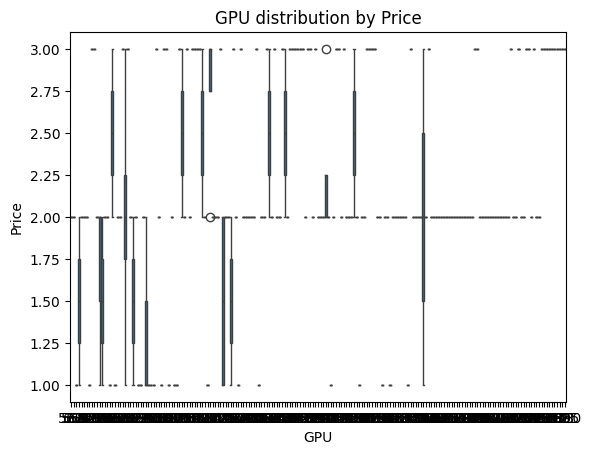

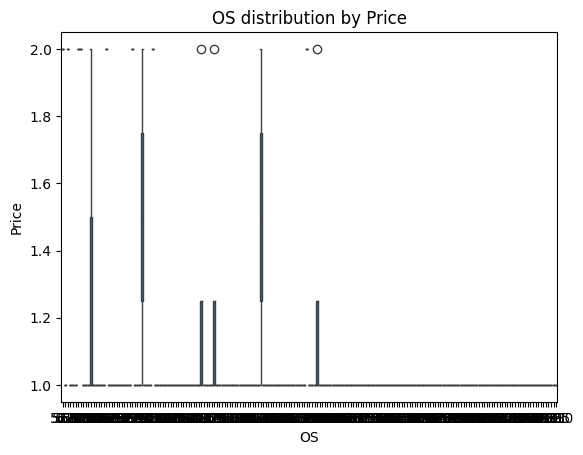

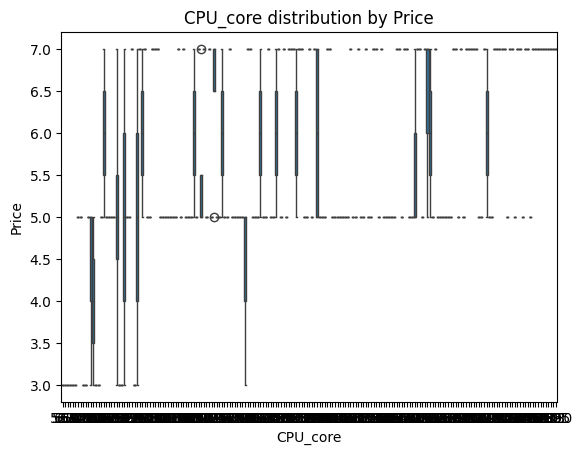

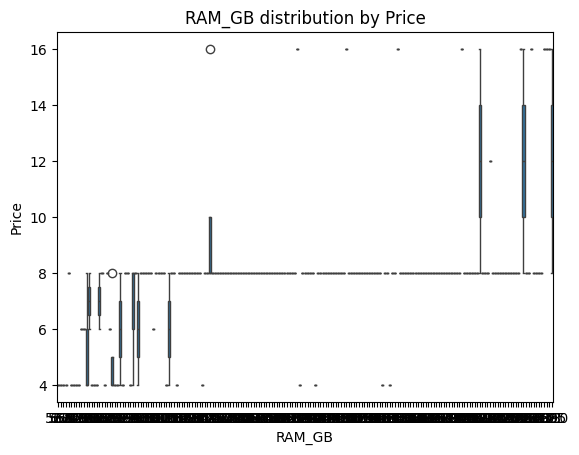

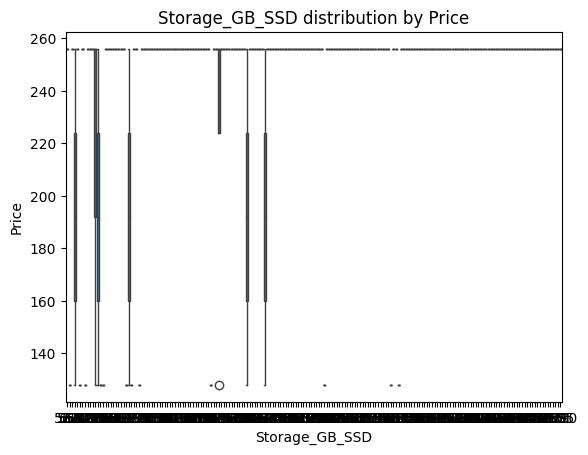

In [21]:
# Function to create regression plots
def plot_regression(df, feature, target):
    sns.lmplot(x=feature, y=target, data=df, fit_reg=False)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

# Function to create box plots
def plot_box(df, feature, target):
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'{feature} distribution by {target}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

# Regression Plots
attributes_to_plot = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attr in attributes_to_plot:
    plot_regression(df, attr, 'Price')

# Box Plots
features_to_plot = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for feat in features_to_plot:
    plot_box(df, feat, 'Price')

In [23]:
# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)
# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')
# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []
for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)
# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})
# Print the results
print(results_df)

                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0.1          Unnamed: 0.1           0.321933             0.321933   
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   
Screen-Full_HD      Screen-Full_HD          -0.021075           

In [26]:
# Function to compute correlation, Pearson coefficient, and p-value
def attribute_correlation(df, target_col):
    corr_values = []
    p_values = []

    # Exclude 'Price' column itself from the operation
    attributes = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_col]

    for attr in attributes:
        corr, p_value = spearmanr(df[attr], df[target_col])
        corr_values.append(corr)
        p_values.append(p_value)

    # Prepare results into a DataFrame
    results = pd.DataFrame({
        'Attribute': attributes,
        'Correlation': corr_values,
        'p-value': p_values
    })
    
    return results

# Specify the target column
target_column = 'Price'

# Compute and print correlations
corr_results = attribute_correlation(df, target_column)
print(corr_results)

           Attribute  Correlation       p-value
0       Unnamed: 0.1     0.373537  2.697100e-09
1         Unnamed: 0     0.373537  2.697100e-09
2           Category     0.384251  8.578496e-10
3                GPU     0.231573  3.147719e-04
4                 OS    -0.254850  6.984778e-05
5           CPU_core     0.442976  7.364602e-13
6   Screen_Size_inch    -0.265403  3.361150e-05
7      CPU_frequency     0.402743  1.075195e-10
8             RAM_GB     0.575599  2.125838e-22
9     Storage_GB_SSD     0.279913  1.167869e-05
10     Weight_pounds    -0.318398  5.239423e-07
11    Screen-Full_HD    -0.028629  6.603450e-01
12  Screen-IPS_panel     0.028629  6.603450e-01


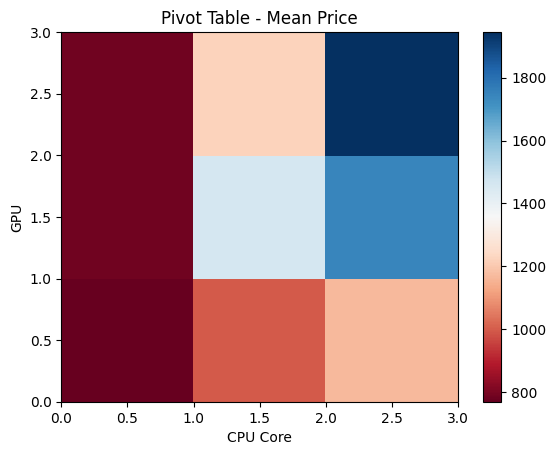

In [27]:
# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')
# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

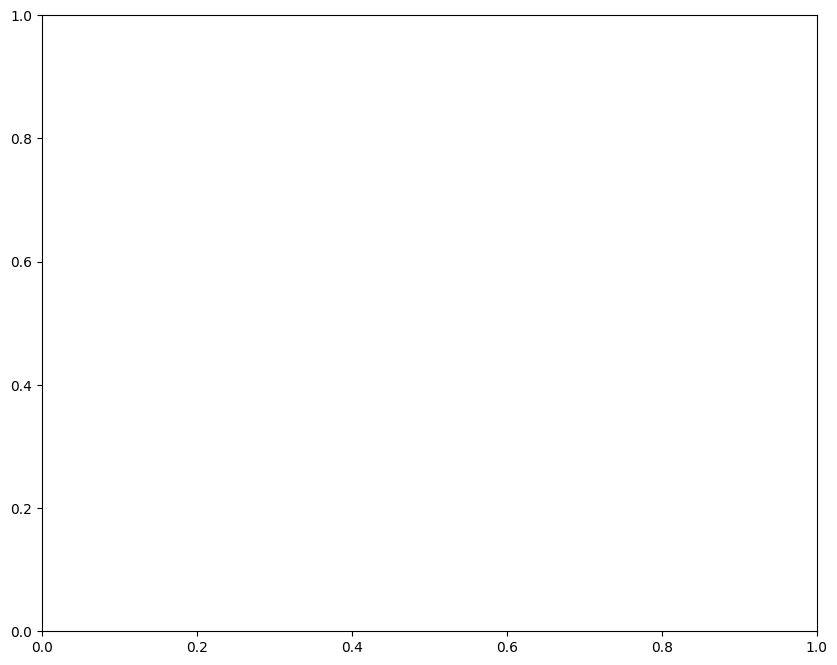

In [28]:
# 1. Group by 'GPU' and 'CPU_core', aggregate 'Price' using mean
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# 2. Prepare the data for pcolor plot
# We need to reshape 'pivot_table' so each element can be passed to pcolor
pivot_data = pivot_table.reset_index().values

# Prepare column and row labels
gpu_labels = pivot_data[:, 0]
cpu_core_labels = pivot_data[:, 1]
price_matrix = pivot_data[:, 2]

# Create meshgrid for labels
gpu_unique, gpu_indices = np.unique(gpu_labels, return_inverse=True)
cpu_core_unique, cpu_core_indices = np.unique(cpu_core_labels, return_inverse=True)

X, Y = np.meshgrid(gpu_indices, cpu_core_indices)

# 3. Create pcolor plot
plt.figure(figsize=(10, 8))
pcolor = plt.pcolor(X, Y, price_matrix, cmap='viridis')
plt.colorbar(pcolor, label='Price (Mean)')

# Add labels and title
plt.xlabel('CPU_core')
plt.ylabel('GPU')
plt.title('Mean Price by GPU and CPU_core Configuration')

# Add labels for GPU and CPU_core at the sides (using annotations)
for (i, j), val in np.ndenumerate(price_matrix):
    plt.text(j, i, f"${val:.2f}", va='center', ha='center')
    
plt.show()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
